<a href="https://colab.research.google.com/github/pablillo77/data_science_1/blob/main/VisualizacionGimenez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos las librerias que utilizaremos

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [3]:
#plt.style.use("fivethirtyeight")
mpl.style.use('ggplot')

# Trabajaremos sobre un dataset sobre diabetes extraido de Kaggle.com, este dataset esta basado en información del National Institute of Diabetes and Digestive and Kidney Diseases. La copia esta alojada en un repositorio público de GitHub que utilizo para el proyecto.
Fuente: https://github.com/pablillo77/data_science_1/blob/main/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf



In [17]:
url = 'https://raw.githubusercontent.com/pablillo77/data_science_1/main/diabetes.csv?token=GHSAT0AAAAAACQE62MIG6B5QH4AC6SJPM6CZQDEJOQ'
df = pd.read_csv(url)


# A continuación se agregan las definiciones de los campos:
Pregnancies: Expresa la cantidad de embarazos

Glucose: Nivel de glucosa en sangre en ayunas en mg/dl

BloodPressure: Presión diastólica en mmHg

SkinThickness: Espesor de la piel en el ticeps en mm

Insulin: Nivel de insulina en sangre en uU/ml

BMI: Indice de masa corporal, es la altura dividida el peso elevado al cuadrado. La altura expresada en metros y el peso en kg.

DiabetesPedigreeFunction: Parametro que expresa la probabilidad de un individuo de desarrollar diabetes, basado en su edad e historia familiar. Varía entre 0,08 y 2,42
Age: Edad

Outcome: Para expresar el resultado final 1: diabetes 0: sin diabetes

#Descripción del dataframe

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Relleno valores en cero por NaN (excepto en la última columna), y calcularé el coeficiente de variación para la insulina y la glucosa

In [18]:
df[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]] = df[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]].replace(to_replace=0, value=np.nan)
#df['Outcome'].replace(to_replace=np.nan, value=0, inplace=True)


In [22]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [19]:
# Calcular el coeficiente de variación para la glucosa y la insulina
coef_var = (df["Glucose"].std() / df['Glucose'].mean() *100).round(2)
print("El coeficiente de variación para la glucosa es:\n",coef_var)
coef_var = (df["Insulin"].std() / df['Insulin'].mean() *100).round(2)
print("El coeficiente de variación para la insulina es:\n",coef_var)
coef_var = (df["SkinThickness"].std() / df['SkinThickness'].mean() *100).round(2)
print("El coeficiente de variación para la SkinThickness es:\n",coef_var)
coef_var = (df["BMI"].std() / df['BMI'].mean() *100).round(2)
print("El coeficiente de variación para la BMI es:\n",coef_var)

El coeficiente de variación para la glucosa es:
 25.09
El coeficiente de variación para la insulina es:
 76.36
El coeficiente de variación para la SkinThickness es:
 35.94
El coeficiente de variación para la BMI es:
 21.34


In [10]:
df["Glucose"].fillna(df["Glucose"].mean(), inplace=True)
print(df.isna().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
df["Insulin"].fillna(df["Insulin"].median(), inplace=True)
print(df.isna().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [12]:
df["SkinThickness"].fillna(df["SkinThickness"].median(), inplace=True)
print(df.isna().sum())

Pregnancies                  0
Glucose                      0
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


In [13]:
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace=True)
print(df.isna().sum())

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


In [14]:
df["BMI"].fillna(df["BMI"].mean(), inplace=True)
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Se hace evidente que la glucosa sigue una distribución que se puede considerar homogenea y por lo tanto la media es representativa. En cuanto a la insulina se deberá considerar la mediana, puesto que la muestra es muy heterogénea.

##Graficos con matplotlib

<Axes: title={'center': 'Insulina'}, ylabel='Frecuencia'>

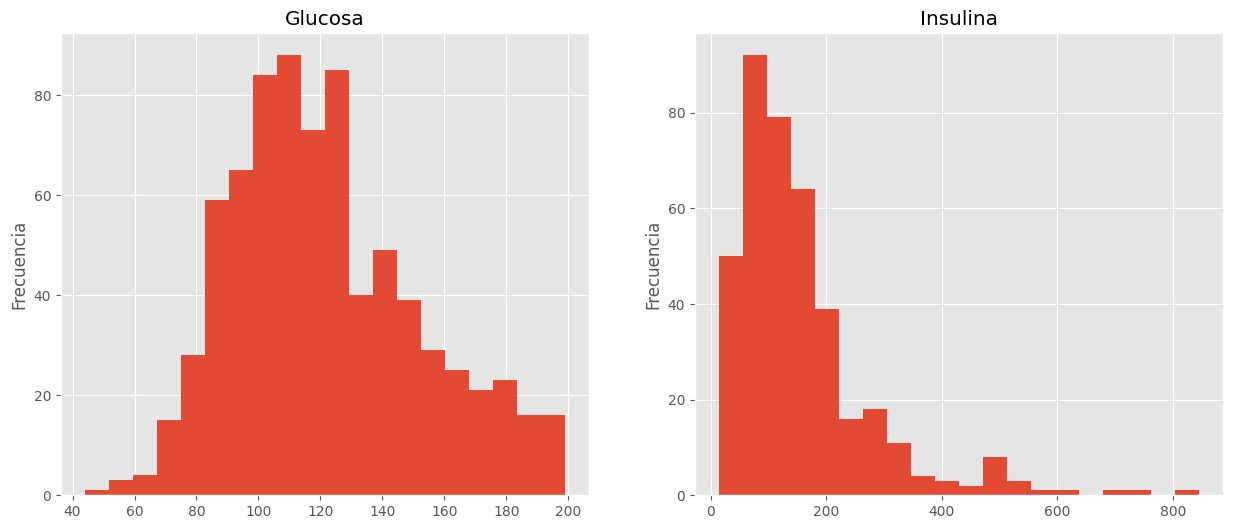

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df['Glucose'].plot(kind='hist', bins=20, title='Glucosa', ylabel='Frecuencia')
plt.subplot(1,2,2)
df['Insulin'].plot(kind='hist', bins=20, title='Insulina', ylabel='Frecuencia')

Text(0, 0.5, 'Insulina (uU/ml)')

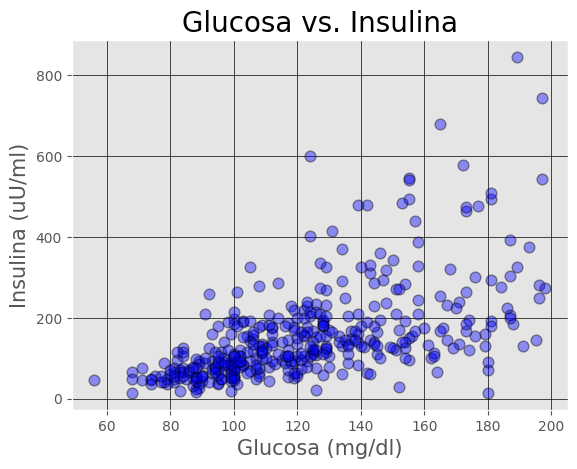

In [21]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df["Glucose"], df["Insulin"], alpha=0.4, facecolor="blue", linewidths=1, s=60, edgecolor="k")
ax.set_title('Glucosa vs. Insulina', fontsize=20)
ax.set_xlabel('Glucosa (mg/dl)', fontsize=15)
ax.set_ylabel('Insulina (uU/ml)', fontsize=15)


## De acuerdo al "Outcome" realizaré un recuento para un gráfico de barras utilizandolo como variable categórica:

Outcome
0.0    500
1.0    268
Name: count, dtype: int64

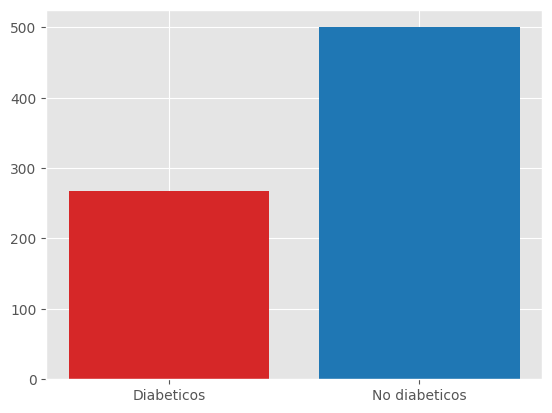

In [ ]:
fig, ax = plt.subplots()

outcomes = [1, 0]
counts = [df['Outcome'].value_counts()[1], df["Outcome"].value_counts()[0]]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(["Diabeticos","No diabeticos"], counts, label=bar_labels, color=bar_colors)
df['Outcome'].value_counts()


## Realizo los mismos histogramas de Glucosa e Insulina pero utilizando seaborn

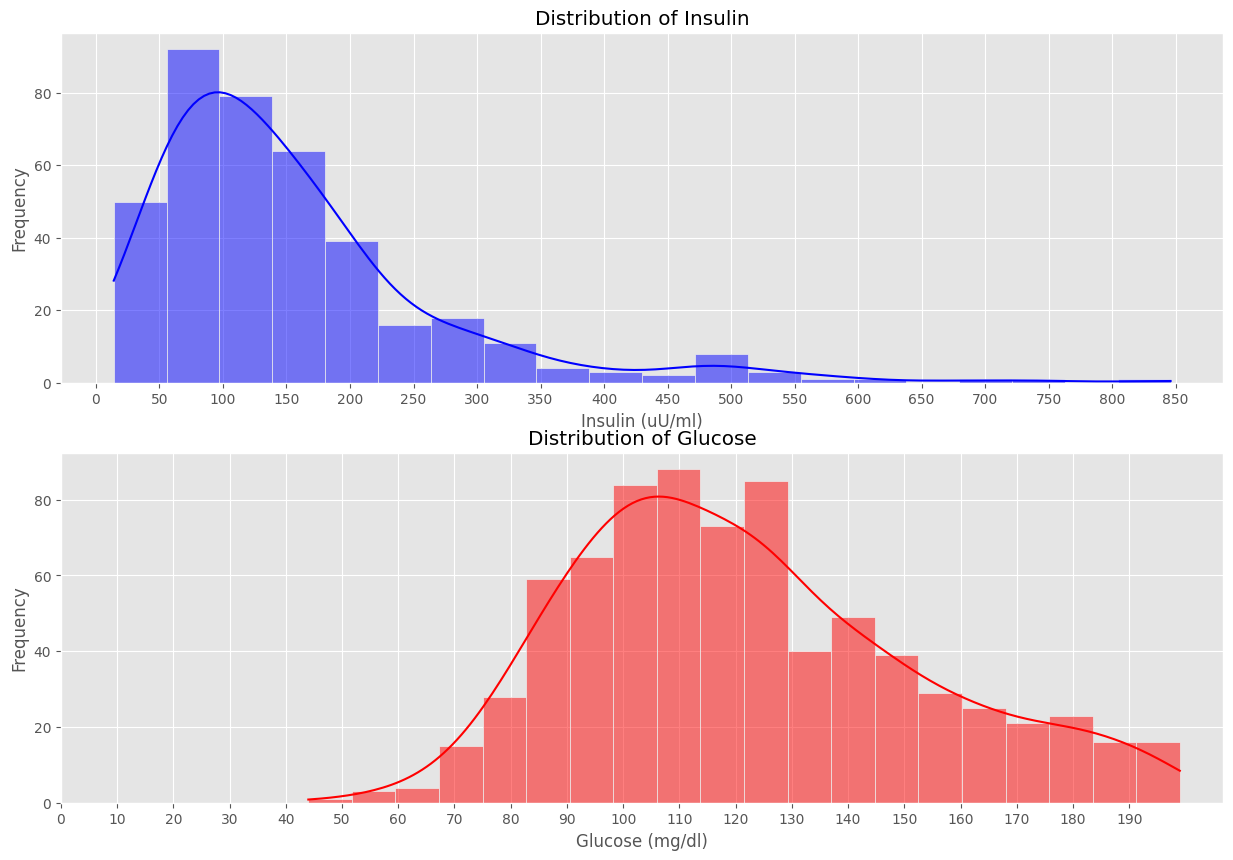

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.histplot(data=df, x="Insulin", bins=20, kde=True, color="blue", ax=ax[0])
ax[0].set_title("Distribution of Insulin")
ax[0].set_xlabel("Insulin (uU/ml)")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 900, 50))
sns.histplot(data=df, x="Glucose", bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("Distribution of Glucose")
ax[1].set_xlabel("Glucose (mg/dl)")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 200, 10))
plt.show()


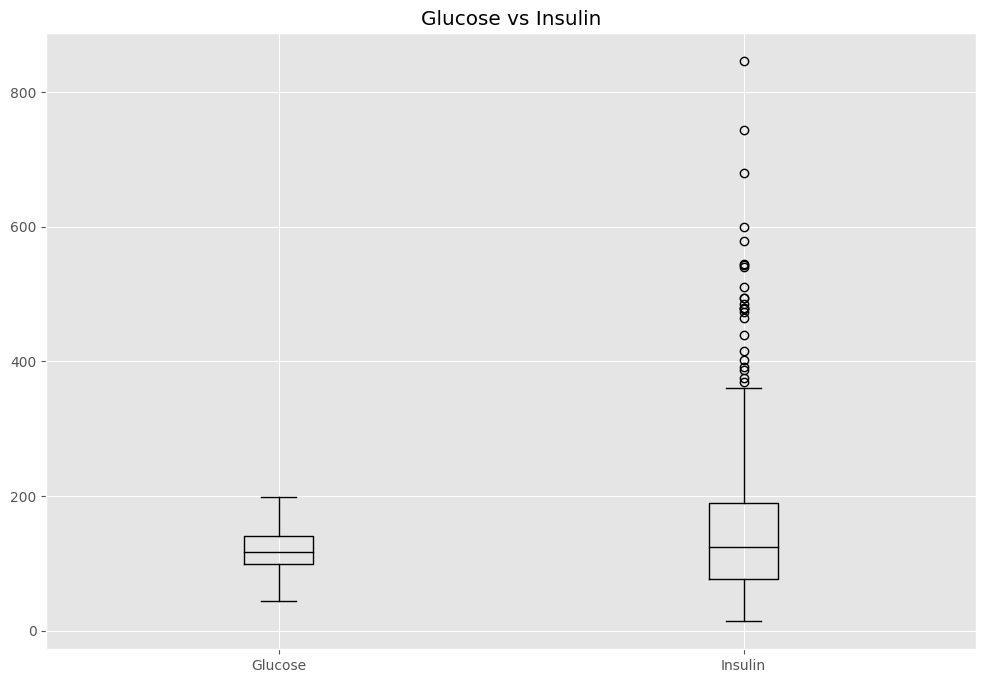

In [ ]:
df[['Glucose', 'Insulin']].plot(kind='box', color="k", title='Glucose vs Insulin', figsize=(12, 8))
plt.gca().spines[['top', 'right',]].set_visible(True)


In [ ]:
# prompt: Show values where "DiabetesPedigreeFunction" is > 1

df.loc[df['DiabetesPedigreeFunction'] >= 2.42]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.42,25,1


In [ ]:
df.tail(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Some dataset descriptions

In [ ]:
print("Dataset´s size is: ")
df.shape


Dataset´s size is: 


(768, 9)

Columns names,dastaset stats description and colum types

In [ ]:
print("Dataset´s columns are: ")
df.columns

Dataset´s columns are: 


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

We don´t seem to have null values!

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking some relations between data, seems that high glucose levels have better correlation with high insulin rather than bloodPressure

In [ ]:
df.loc[df.Glucose >= 120, 'BloodPressure']

0      72
2      64
4      40
8      70
9      96
       ..
759    92
761    74
764    70
765    72
766    60
Name: BloodPressure, Length: 360, dtype: int64

In [ ]:
print(df['Glucose'].corr(df['BloodPressure']))
print((df.Glucose >= 120).corr(df['Insulin']))

0.22319177824954195
0.48447159165660586
